In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'


In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
c1 = torch.distributions.Normal(80, 10)
c2 = torch.distributions.Normal(70, 10)
c3 = torch.distributions.Normal(90, 5)

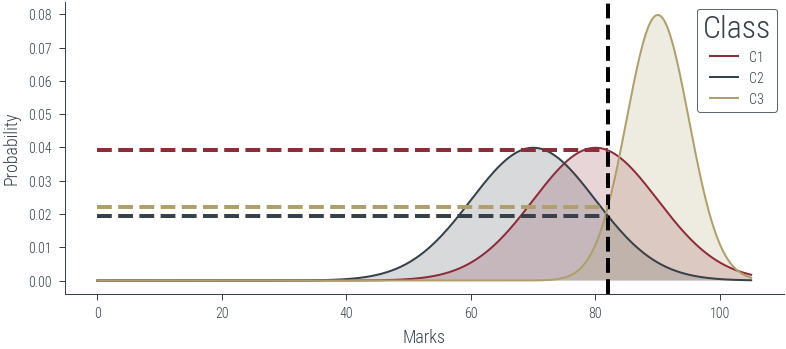

In [4]:
# Plot the distributions
x = torch.linspace(0, 105, 1000)
plt.plot(x, c1.log_prob(x).exp(), label='C1')
plt.plot(x, c2.log_prob(x).exp(), label='C2')
plt.plot(x, c3.log_prob(x).exp(), label='C3')
# Fill the area under the curve
plt.fill_between(x, c1.log_prob(x).exp(), alpha=0.2)
plt.fill_between(x, c2.log_prob(x).exp(), alpha=0.2)
plt.fill_between(x, c3.log_prob(x).exp(), alpha=0.2)

plt.xlabel('Marks')
plt.ylabel('Probability')

plt.legend(title='Class')
plt.savefig('../figures/mle/mle-example.pdf', bbox_inches='tight')

# Vertical line at x = 85
marks = torch.tensor([82.])
plt.axvline(marks.item(), color='k', linestyle='--', lw=2)
# Draw horizontal line to show the probability at x = 85
plt.hlines(c1.log_prob(marks).exp(), 0, marks.item(), color='C0', linestyle='--', lw=2)
plt.hlines(c2.log_prob(marks).exp(), 0, marks.item(), color='C1', linestyle='--', lw=2)
plt.hlines(c3.log_prob(marks).exp(), 0, marks.item(), color='C2', linestyle='--', lw=2)
plt.savefig('../figures/mle/mle-example-2.pdf', bbox_inches='tight')


Text(0, 0.5, 'Likelihood $p(x = 20|\\mu$)')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


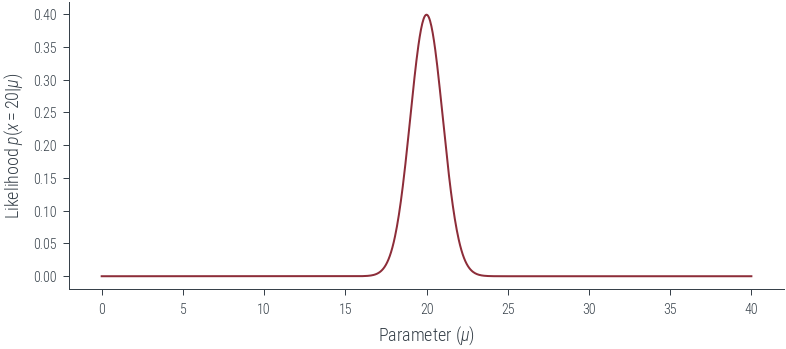

In [5]:
obs = torch.tensor([20.0])
sigma = torch.tensor([1.0])

# Plot the likelihood
mus = torch.linspace(0, 40, 1000)
plt.plot(mus, torch.distributions.Normal(mus, sigma).log_prob(obs).exp())
plt.xlabel(r'Parameter ($\mu$)')
plt.ylabel(r'Likelihood $p(x = 20|\mu$)')

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [7]:
# Interactive plot showing fitting normal distribution of varying mu to one data point

def plot_norm(mu):
    mu = torch.tensor(mu)
    sigma = torch.tensor(1.0)
    x = torch.tensor(20.0)
    n = torch.distributions.Normal(mu, sigma)
    x_lin = torch.linspace(0, 40, 500)
    y_lin = n.log_prob(x_lin).exp()
    likelihood = n.log_prob(x).exp()
    plt.plot(x_lin, y_lin, label=rf"$\mathcal{{N}}({mu.item():0.4f}, 1)$")
    plt.legend()
    plt.title(f"Likelihood={likelihood:.4f}")
    plt.ylim(0, 0.5)
    plt.fill_between(x_lin, y_lin, alpha=0.2)
    plt.axvline(x=x, color="black", linestyle="--")
    plt.axhline(y=likelihood, color="black", linestyle="--")
        
#plot_norm(20)
interact(plot_norm, mu=(0, 30, 0.1))


interactive(children=(FloatSlider(value=15.0, description='mu', max=30.0), Output()), _dom_classes=('widget-in…

<function __main__.plot_norm(mu)>

In [8]:
# Interactive plot showing fitting normal distribution of varying mu to one data point

def plot_norm_log(mu):
    mu = torch.tensor(mu)
    sigma = torch.tensor(1.0)
    x = torch.tensor(20.0)
    n = torch.distributions.Normal(mu, sigma)
    x_lin = torch.linspace(0, 40, 500)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    y_log_lin = n.log_prob(x_lin)
    y_lin = y_log_lin.exp()
    ll = n.log_prob(x)
    likelihood = ll.exp()
    ax[0].plot(x_lin, y_lin, label=rf"$\mathcal{{N}}({mu.item():0.4f}, 1)$")
    #plt.legend()
    ax[0].set_title(f"Likelihood={likelihood:.4f}")
    ax[0].set_ylim(0, 0.5)
    ax[0].fill_between(x_lin, y_lin, alpha=0.2)

    ax[1].plot(x_lin, y_log_lin, label=rf"$\mathcal{{N}}({mu.item():0.4f}, 1)$")
    ax[1].set_title(f"Log Likelihood={ll:.4f}")
    ax[1].set_ylim(-500, 20)
    
    ax[0].axvline(x=x, color="black", linestyle="--")
    ax[0].axhline(y=likelihood, color="black", linestyle="--")

    ax[1].axvline(x=x, color="black", linestyle="--")
    ax[1].axhline(y=ll, color="black", linestyle="--")
        
#plot_norm_log(10)
interact(plot_norm_log, mu=(0, 30, 0.1))


interactive(children=(FloatSlider(value=15.0, description='mu', max=30.0), Output()), _dom_classes=('widget-in…

<function __main__.plot_norm_log(mu)>

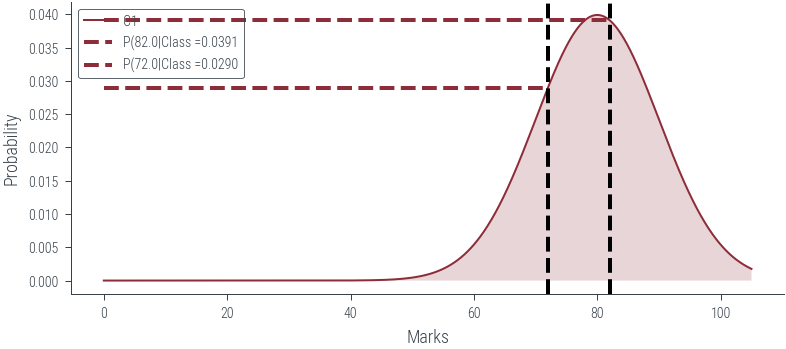

In [9]:
# Plot the distributions
def plot_class(class_num):
    x = torch.linspace(0, 105, 1000)
    dist = [c1, c2, c3][class_num-1]
    plt.plot(x, dist.log_prob(x).exp(), label=f'C{class_num}')
    plt.fill_between(x, dist.log_prob(x).exp(), alpha=0.2)


    plt.xlabel('Marks')
    plt.ylabel('Probability')

    #plt.legend(title='Class')
    #plt.savefig('../figures/mle/mle-example.pdf', bbox_inches='tight')

    # Vertical line at x = 82
    marks = torch.tensor([82., 72.0])
    for mark in marks:
        plt.axvline(mark.item(), color='k', linestyle='--', lw=2)

        plt.hlines(dist.log_prob(mark).exp(), 0, mark.item(), color='C0', linestyle='--', lw=2, label=f"P({mark.item()}|Class ={dist.log_prob(mark).exp().item():0.4f}")
        #plt.hlines(c2.log_prob(mark).exp(), 0, mark.item(), color='C1', linestyle='--', lw=2)
        #plt.hlines(c3.log_prob(mark).exp(), 0, mark.item(), color='C2', linestyle='--', lw=2)
    #plt.savefig('../figures/mle/mle-example-2.pdf', bbox_inches='tight')
    plt.legend()
    #plt.savefig("..")

plot_class(1)

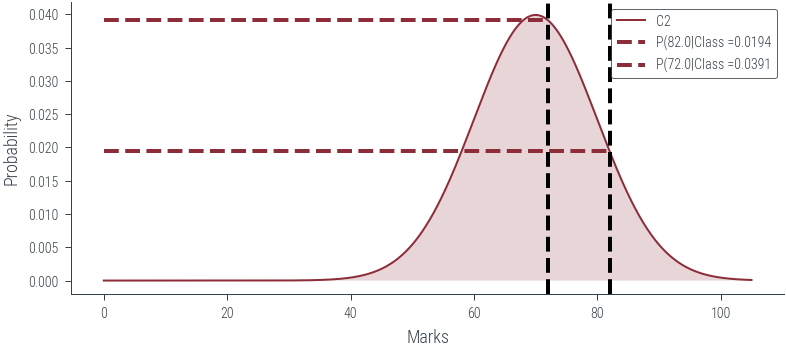

In [10]:
plot_class(2)

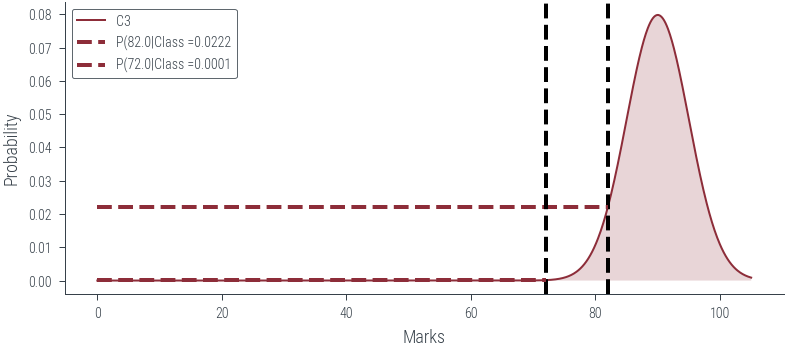

In [11]:
plot_class(3)

In [12]:
#
s1 = torch.tensor([82.0])
s2 = torch.tensor([72.0])

p_s1_c1 = c1.log_prob(s1).exp()
p_s1_c2 = c2.log_prob(s1).exp()
p_s1_c3 = c3.log_prob(s1).exp()

p_s2_c1 = c1.log_prob(s2).exp()
p_s2_c2 = c2.log_prob(s2).exp()
p_s2_c3 = c3.log_prob(s2).exp()

# Create dataframe
df = pd.DataFrame({
    'Class': ['C1', 'C2', 'C3'],
    'Student 1 (82)': [p_s1_c1.item(), p_s1_c2.item(), p_s1_c3.item()],
    'Student 2 (72)': [p_s2_c1.item(), p_s2_c2.item(), p_s2_c3.item()]
})

df = df.set_index('Class')
df

,Student 1 (82),Student 2 (72)
Class,,
C1,0.039104,0.028969
C2,0.019419,0.039104
C3,0.022184,0.000122


<AxesSubplot:xlabel='Class'>

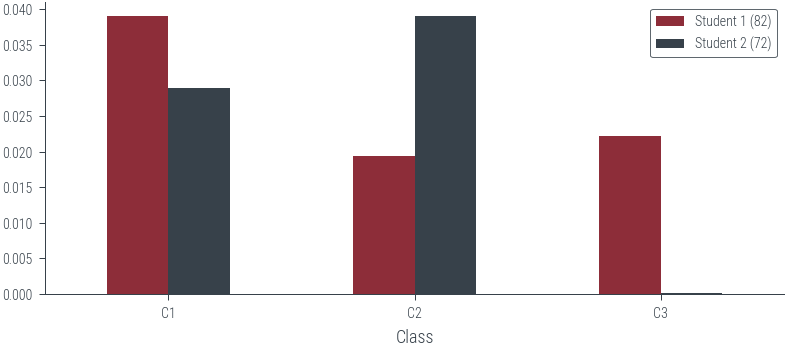

In [13]:
df.plot(kind='bar', rot=0)

In [14]:
# Multiply the probabilities
df.aggregate('prod', axis=1)


Class
C1    0.001133
C2    0.000759
C3    0.000003
dtype: float64

<AxesSubplot:xlabel='Class'>

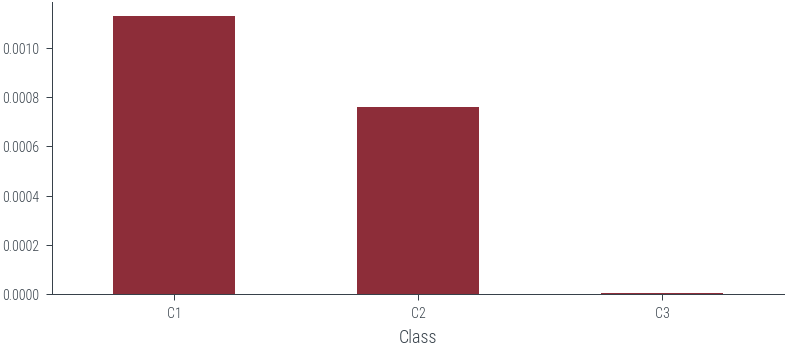

In [15]:
df.aggregate('prod', axis=1).plot(kind='bar', rot=0)

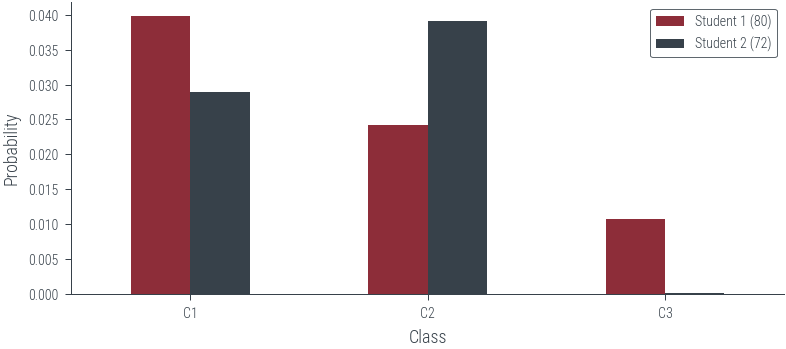

In [16]:
# Create a slider to change s1 and s2 marks and plot the likelihood


def plot_likelihood(s1, s2, scale='log'):
    s1 = torch.tensor([s1])
    s2 = torch.tensor([s2])
    p_s1_c1 = c1.log_prob(s1)
    p_s1_c2 = c2.log_prob(s1)
    p_s1_c3 = c3.log_prob(s1)

    p_s2_c1 = c1.log_prob(s2)
    p_s2_c2 = c2.log_prob(s2)
    p_s2_c3 = c3.log_prob(s2)


    # Create dataframe
    df = pd.DataFrame({
        'Class': ['C1', 'C2', 'C3'],
        f'Student 1 ({s1.item()})': [p_s1_c1.item(), p_s1_c2.item(), p_s1_c3.item()],
        f'Student 2 ({s2.item()})': [p_s2_c1.item(), p_s2_c2.item(), p_s2_c3.item()]
    })
    
    

    df = df.set_index('Class')
    if scale!='log':
        df  = df.apply(np.exp)
    df.plot(kind='bar', rot=0)
    plt.ylabel('Probability')
    plt.xlabel('Class')

    if scale=='log':
        plt.ylabel('Log Probability')
        #plt.yscale('log')

plot_likelihood(80, 72, scale='linear')

    

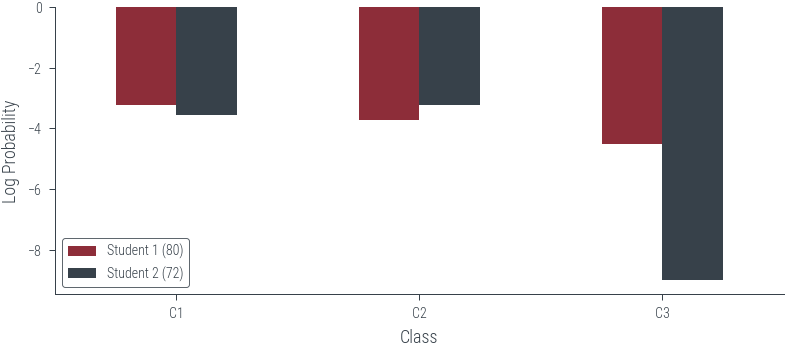

In [17]:
plot_likelihood(80, 72, scale='log')


In [18]:
# Interactive plot
interact(plot_likelihood, s1=(0, 100), s2=(0, 100), scale=['linear', 'log'])

interactive(children=(IntSlider(value=50, description='s1'), IntSlider(value=50, description='s2'), Dropdown(d…

<function __main__.plot_likelihood(s1, s2, scale='log')>

In [43]:
# Let us now consider some N points from a univariate Gaussian distribution with mean 0 and variance 1.

N = 5
torch.manual_seed(2)
samples = torch.distributions.Normal(0, 1).sample((N,))
samples

tensor([ 0.3923, -0.2236, -0.3195, -1.2050,  1.0445])

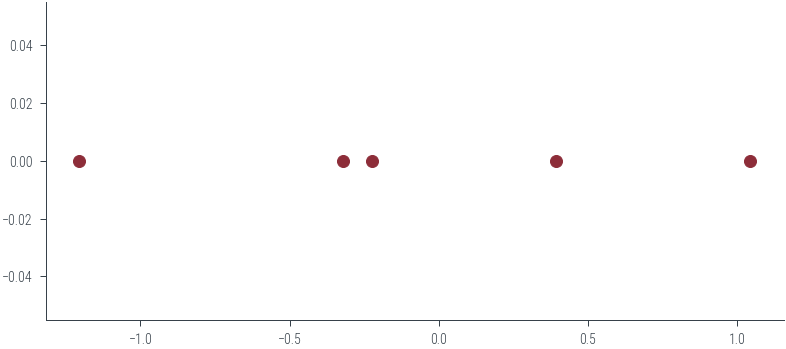

In [44]:
plt.scatter(samples, np.zeros_like(samples))

In [45]:
def ll(mu, sigma):
    mu = torch.tensor(mu)
    sigma = torch.tensor(sigma)

    dist = torch.distributions.Normal(mu, sigma)
    loglik = dist.log_prob(samples).sum()
    return dist, loglik

def plot_normal(mu, sigma):
    xs = torch.linspace(-5, 5, 100)
    dist, loglik = ll(mu, sigma)
    ys_log = dist.log_prob(xs)
    plt.plot(xs, ys_log)

    plt.scatter(samples, dist.log_prob(samples), color='C3', alpha=0.5)
    plt.title(f'log likelihood: {loglik:.8f}')
   

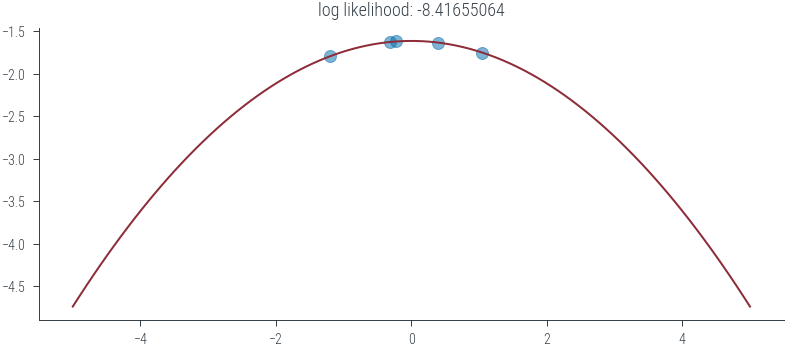

In [46]:
plot_normal(0, 2)
#plt.ylim(-1.7, -1.6)

In [47]:
interact(plot_normal, mu=(-3.0, 3.0), sigma=(0.1, 10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=5.05, des…

<function __main__.plot_normal(mu, sigma)>

In [91]:
def get_lls(mus, sigmas):

    lls = torch.zeros((len(mus), len(sigmas)))
    for i, mu in enumerate(mus):
        for j, sigma in enumerate(sigmas):

            lls[i, j] = ll(mu, sigma)[1]
    return lls

mus = torch.linspace(-1, 1, 100)
sigmas = torch.linspace(0.1, 1.5, 100)
lls = get_lls(mus, sigmas)

/tmp/ipykernel_302139/3787141935.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu = torch.tensor(mu)
/tmp/ipykernel_302139/3787141935.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma = torch.tensor(sigma)


/tmp/ipykernel_302139/1128417763.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


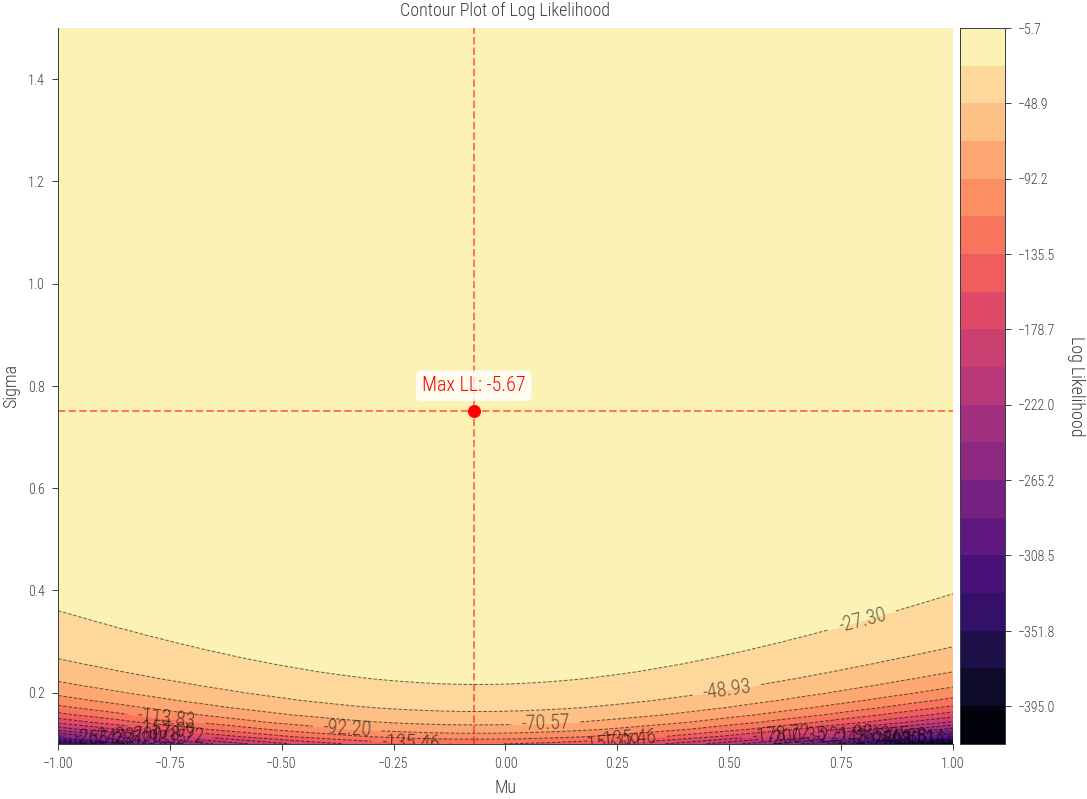

In [92]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_lls(mus, sigmas, lls):
    fig, ax1 = plt.subplots(figsize=(8, 6))
    
    X, Y = np.meshgrid(mus, sigmas)
    
    max_indices = np.unravel_index(np.argmax(lls), lls.shape)
    max_mu = mus[max_indices[1]]
    max_sigma = sigmas[max_indices[0]]
    max_loglik = lls[max_indices]

    # Define levels with increasing granularity
    levels_low = np.linspace(lls.min(), max_loglik, 20)
    levels_high = np.linspace(max_loglik + 0.001, lls.max(), 10)  # Adding a small value to prevent duplicates
    levels = levels_low
    
    # Plot the contour filled plot
    contour = ax1.contourf(X, Y, lls.T, levels=levels, cmap='magma')
    
    # Plot the contour lines
    contour_lines = ax1.contour(X, Y, lls.T, levels=levels, colors='black', linewidths=0.5, alpha=0.6)
    
    # Add contour labels
    ax1.clabel(contour_lines, inline=True, fontsize=10, colors='black', fmt='%1.2f')
    
    ax1.set_xlabel('Mu')
    ax1.set_ylabel('Sigma')
    ax1.set_title('Contour Plot of Log Likelihood')
    
    # Add maximum log likelihood point as scatter on the contour plot
    ax1.scatter([max_mu], [max_sigma], color='red', marker='o', label='Maximum Log Likelihood')
    ax1.annotate(f'Max LL: {max_loglik:.2f}', (max_mu, max_sigma), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

    ax1.axvline(max_mu, color='red', linestyle='--', alpha=0.5)
    ax1.axhline(max_sigma, color='red', linestyle='--', alpha=0.5)
    
    # Create colorbar outside the plot
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(contour, cax=cax)
    cbar.set_label('Log Likelihood', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()

plot_lls(mus, sigmas, lls)


In [93]:
samples.mean(), samples.std(correction=0)

(tensor(-0.0623), tensor(0.7523))

/tmp/ipykernel_302139/3787141935.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu = torch.tensor(mu)
/tmp/ipykernel_302139/3787141935.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma = torch.tensor(sigma)
/tmp/ipykernel_302139/1128417763.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


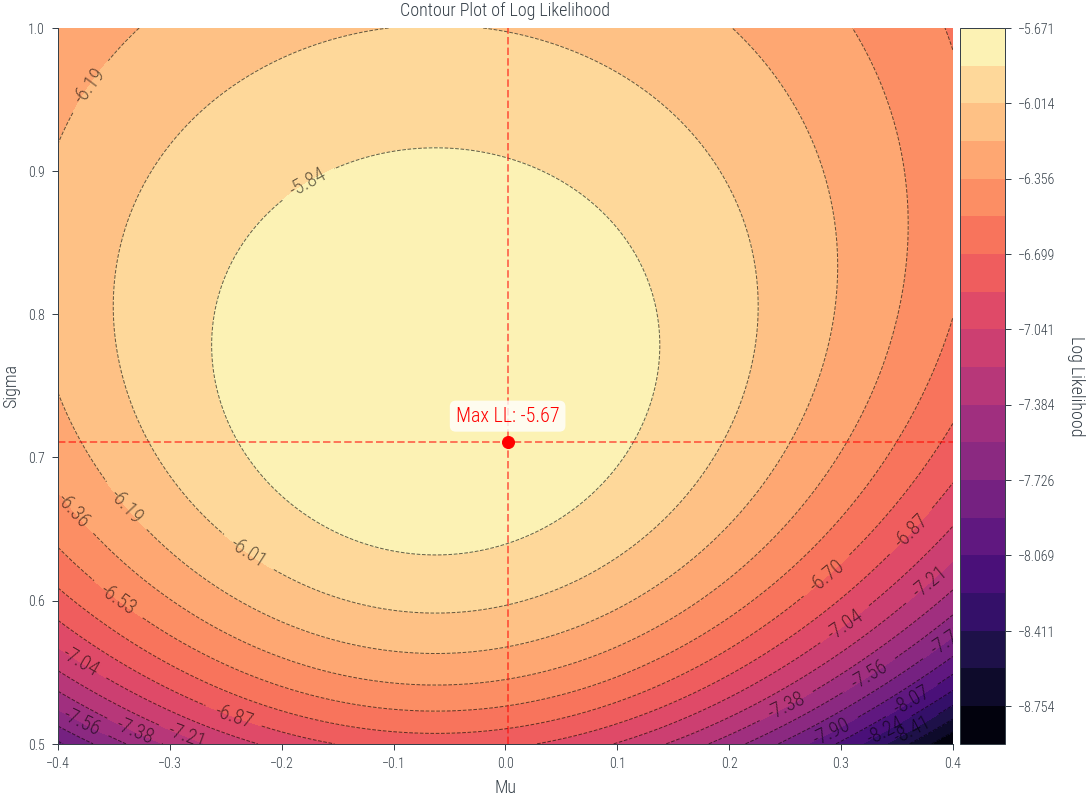

In [94]:
mus = torch.linspace(-0.4, 0.4, 200)
sigmas = torch.linspace(0.5, 1.0,200)
lls = get_lls(mus, sigmas)
plot_lls(mus, sigmas, lls)